## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study= pd.merge(mouse_metadata, study_results, on= 'Mouse ID')
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, 
#standard deviation, and SEM of the tumor volume for each regimen
mouse_study['Drug Regimen'].value_counts()


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

In [3]:
#mean for each drug regimen
mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
mouse_mean= mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
mouse_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [4]:
#median for each drug regimen
mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
mouse_median= mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
mouse_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [5]:
#variance for each drug regimen
mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
mouse_variance= mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
mouse_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [6]:
#standard deviation for each drug regimen
mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
mouse_standard= mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
mouse_standard

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [7]:
# SEM for each drug regimen
mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
mouse_sem= mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
mouse_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [8]:
Summary_Table= pd.DataFrame({"Mean": mouse_mean, "Median": mouse_median, "Variance": mouse_variance, 
                             "Standard Deviation": mouse_standard, "Standard Error of Mean": mouse_sem})
Summary_Table

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

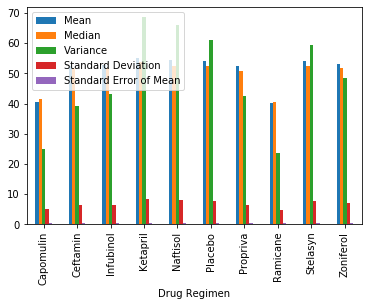

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
Bar_Plot= Summary_Table.plot.bar(legend= 'best', rot=90)

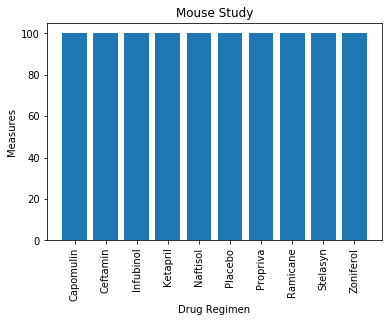

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Set the xlabel and ylabel using class methods
Drug_Regimens= ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 
                'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol' ]
Measures = ['Mean', 'Median', 'Mode','Variance', 'Standard Deviation', 'Standard Error of Mean']

x= Drug_Regimens
y= Measures


x_axis = np.arange(len(x))
plt.bar(x,height= 100)
plt.xlabel("Drug Regimen")
plt.ylabel("Measures")
plt.title("Mouse Study")
plt.xticks(x_axis, rotation= 'vertical')
plt.show()


## Pie plots

In [11]:
mouse_study['Sex'].value_counts()

Male      958
Female    935
Name: Sex, dtype: int64

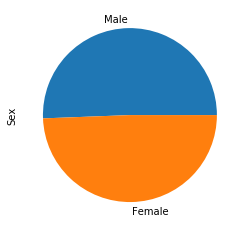

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_study['Sex'].value_counts()
distr= mouse_study['Sex'].value_counts()
distr.plot.pie()


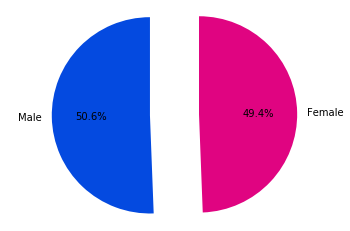

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels= 'Male', 'Female'
sizes= [958,935]
explode = (0.5, 0)
colors= ('#044ae0', '#e00481')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  

plt.show()


## Quartiles, outliers and boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
new_df= mouse_study[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)', 'Weight (g)']]
new_df

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Weight (g)
0,k403,Ramicane,0,45.000000,16
1,k403,Ramicane,5,38.825898,16
2,k403,Ramicane,10,35.014271,16
3,k403,Ramicane,15,34.223992,16
4,k403,Ramicane,20,32.997729,16
...,...,...,...,...,...
1888,z969,Naftisol,25,63.145652,30
1889,z969,Naftisol,30,65.841013,30
1890,z969,Naftisol,35,69.176246,30
1891,z969,Naftisol,40,70.314904,30


In [15]:
mouse_capomulin= new_df[new_df['Drug Regimen']== 'Capomulin']
mouse_ramicane= new_df[new_df['Drug Regimen']== 'Ramicane']
mouse_ceftamin= new_df[new_df['Drug Regimen']== 'Ceftamin']
mouse_infubinol= new_df[new_df['Drug Regimen']== 'Infubinol']

drug_treatments= mouse_capomulin.append(mouse_ramicane)
drug_treatments= drug_treatments.append(mouse_ceftamin)
drug_treatments= drug_treatments.append(mouse_infubinol)
drug_treatments= drug_treatments.set_index('Mouse ID')

drug_treatments= drug_treatments[drug_treatments['Timepoint']== 45]
drug_treatments


,Drug Regimen,Timepoint,Tumor Volume (mm3),Weight (g)
Mouse ID,,,,
s185,Capomulin,45,23.343598,17
x401,Capomulin,45,28.484033,15
m601,Capomulin,45,28.430964,17
u364,Capomulin,45,31.023923,17
y793,Capomulin,45,31.896238,17
...,...,...,...,...
e476,Infubinol,45,62.435404,26
f345,Infubinol,45,60.918767,26
k483,Infubinol,45,66.196912,30


In [23]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = drug_treatments['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of drug_treatments is: {lowerq}")
print(f"The upper quartile of drug_treatments is: {upperq}")
print(f"The interquartile range of drug_treatments is: {iqr}")
print(f"The the median of drug_treatments is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of drug_treatments is: 33.48002734
The upper quartile of drug_treatments is: 62.14221369
The interquartile range of drug_treatments is: 28.66218635
The the median of drug_treatments is: 40.1592203 
Values below -9.513252184999999 could be outliers.
Values above 105.135493215 could be outliers.


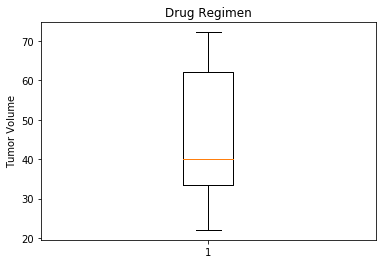

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(drug_treatments['Tumor Volume (mm3)'])
plt.show()

## Line and scatter plots

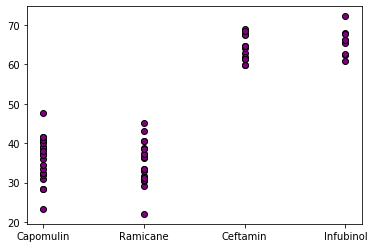

In [26]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x= drug_treatments['Drug Regimen']
y= drug_treatments['Tumor Volume (mm3)']


plt.scatter(x, y, marker="o", facecolors="purple", edgecolors="black")

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume 
#for the Capomulin regimen